### **The aim of this project is to try to create an AI model that based on classifier trees, is able to predict whether or not a patient of certain characteristics suffers from any heart disease or not**


May, 2023

In [1]:
# Setup

import pandas as pd

#Save filepath to variable for easier access :)
factors_data_file_path = '../input/exploring-risk-factors-for-cardiovascular-diseas/heart_data.csv'

# Read the data and store data in a DataFrame
factors_data = pd.read_csv(factors_data_file_path)
factors_data.describe()
# factors_data.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


**Model Creation**

In [2]:
# Data
from sklearn.model_selection import train_test_split

# Prediction target - We want to predict whether or not a certain individual suffers from cardiovascular heart diseases
y = factors_data.cardio # Cardio is a boolean variable that indicates whether or not a person suffers any cardiovascular heart disease

# Features - We are going to use all the other features.
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
factors_data['age'] = factors_data['age'].apply(lambda x: int(x/365)) # We are converting age into years since it came in days

X = factors_data[features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=9)
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50,2,168,62.0,110,80,1,1,0,0,1
1,55,1,156,85.0,140,90,3,1,0,0,1
2,51,1,165,64.0,130,70,3,1,0,0,0
3,48,2,169,82.0,150,100,1,1,0,0,1
4,47,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1
69996,61,1,158,126.0,140,90,2,2,0,0,1
69997,52,2,183,105.0,180,90,3,1,0,1,0
69998,61,1,163,72.0,135,80,1,2,0,0,0


In [3]:
# Fitting

from sklearn.ensemble import RandomForestClassifier # This is a binary classification problem

factors_forest_model = RandomForestClassifier(random_state = 9)
factors_forest_model.fit(train_X, train_y)

# Predicting
factors_prediction = factors_forest_model.predict(val_X)

# Validation
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(val_y, factors_prediction))

0.2959428571428571


**Data Visualization**

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

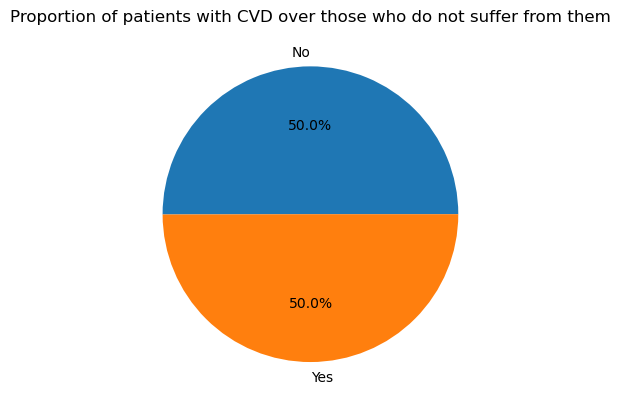

In [5]:
plt.pie(factors_data['cardio'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Proportion of patients with CVD over those who do not suffer from them')
plt.show()

After realizing that data is equally distributed within patients that suffer from cardiovascular heart diseases and those who don't; we are going to both check for biased data and interesting patterns via some histograms.

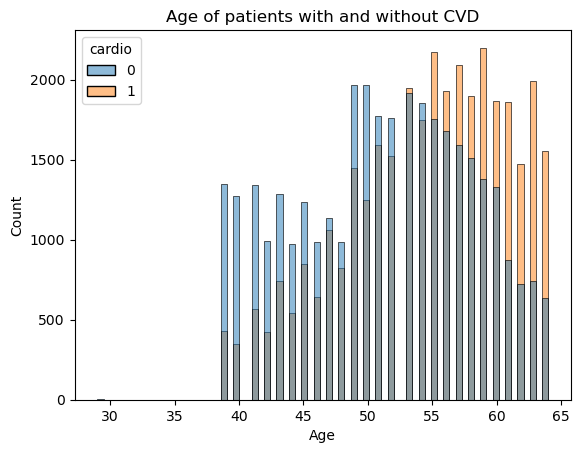

In [6]:
sns.histplot(data=factors_data, x = 'age', hue = 'cardio')
plt.title("Age of patients with and without CVD")
plt.xlabel("Age")
plt.show()

The histogram reveals a notable increase in the prevalence of CVD from the age of 53 onwards, whilst indicating a lower occurrence among individuals under 40.

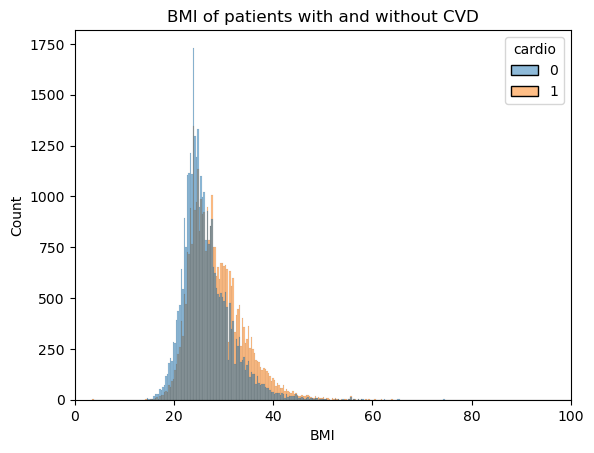

In [7]:
# From my humble point of view, it is more important to analyze BMI than weight and height separately
factors_data['BMI'] = factors_data['weight'] / (factors_data['height'] / 100) ** 2

sns.histplot(data=factors_data, x = 'BMI', hue = 'cardio')
plt.title("BMI of patients with and without CVD")
plt.xlabel("BMI")
plt.xlim(0, 100)
plt.show()

The main tendency is for overweight, obese and extremely obese individuals to suffer from CVD